<a href="https://colab.research.google.com/github/Alice-zou/Mars-Gang/blob/main/2_HIRISE_ART_StableDiffusion_Alice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Overview:
#    Make creative Mars Arts WITH HIRISE pictures and Artificial Intelligence & Machine Learning Programs
# Approaches:
#    Develop a program to invoke AI/ML libs
#    Input creative prompts to Stable Diffusion
#    Use a loop to generate multiple images with one click
# 

In [ ]:
print ('Alice: Make creative Mars Arts WITH HIRISE pictures and Artificial Intelligence & Machine Learning Programs')

Alice: Make creative Mars Arts WITH HIRISE pictures and Artificial Intelligence & Machine Learning Programs


In [ ]:
%pwd

'/content/hirise-art-stablediffusion-alice'

In [ ]:
%mkdir hirise-art-stablediffusion-alice

In [ ]:
%cd /content/hirise-art-stablediffusion-alice

/content/hirise-art-stablediffusion-alice


In [ ]:
%pwd

'/content/hirise-art-stablediffusion-alice'

In [ ]:
%ls

artImage1.jpg  artImage3.jpg  hirise-art-stablediffusion-alice/
artImage2.jpg  artImage4.jpg  output.jpg


In [ ]:
# After the following line of login is executed, need to click the link to copy over the token

In [ ]:
!huggingface-cli login


        _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
        _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
        _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
        _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
        _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

        To login, `huggingface_hub` now requires a token generated from https://huggingface.co/settings/tokens .
        
Token: 
Login successful
Your token has been saved to /root/.huggingface/token


In [ ]:
!git config --global credential.helper store

In [ ]:
%pip install --quiet --upgrade  scipy mediapy diffusers transformers

In [ ]:
!nvidia-smi

Sat Oct  1 21:36:25 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0    31W /  70W |  14802MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch
from torch import autocast


In [ ]:
from diffusers import PNDMScheduler, StableDiffusionPipeline
sched = PNDMScheduler(beta_start=0.00092, beta_end=0.013, beta_schedule="scaled_linear", skip_prk_steps=True)


In [ ]:
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", scheduler=sched, torch_dtype=torch.float16, revision="fp16", use_auth_token=True)

pipe = pipe.to("cuda")



Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


In [ ]:
promptText = "Some mining machines working on Mars, and human base colonize on the desert of Mars"
promptTexts = [ promptText ] * output_image_num
output_image_num = 1

In [ ]:
fstart = 'artImage'
fend='.jpg'


  0%|          | 0/47 [00:00<?, ?it/s]

""

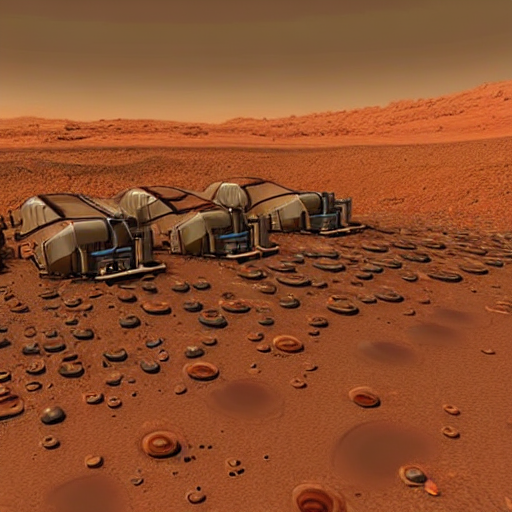

artImage1.jpg
1
artImage1.jpg  artImage3.jpg  hirise-art-stablediffusion-alice/
artImage2.jpg  artImage4.jpg  output.jpg


  0%|          | 0/47 [00:00<?, ?it/s]

""

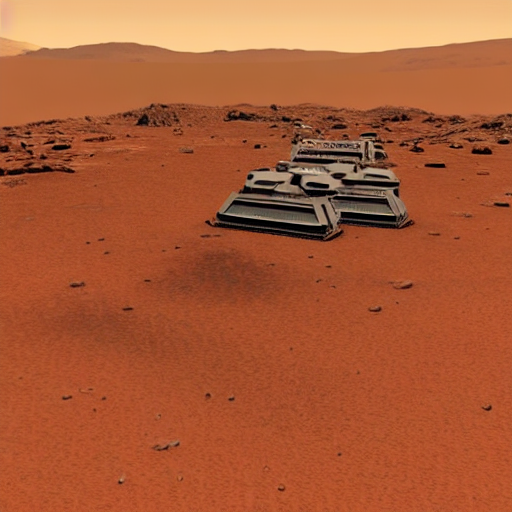

artImage2.jpg
2
artImage1.jpg  artImage3.jpg  hirise-art-stablediffusion-alice/
artImage2.jpg  artImage4.jpg  output.jpg


  0%|          | 0/47 [00:00<?, ?it/s]

""

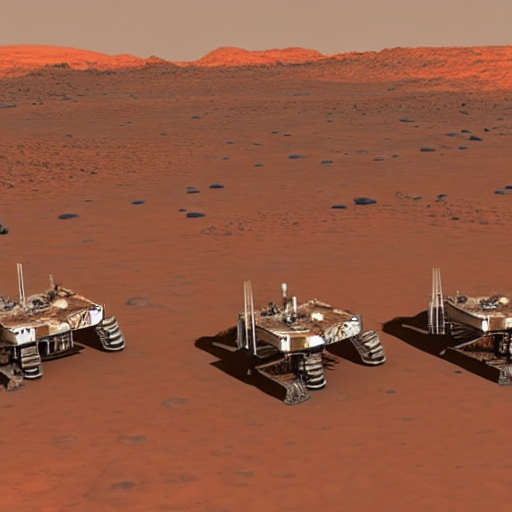

artImage3.jpg
3
artImage1.jpg  artImage3.jpg  hirise-art-stablediffusion-alice/
artImage2.jpg  artImage4.jpg  output.jpg


  0%|          | 0/47 [00:00<?, ?it/s]

""

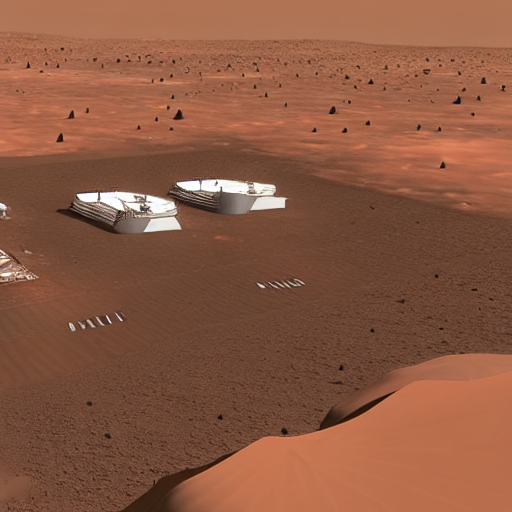

artImage4.jpg
4
artImage1.jpg  artImage3.jpg  hirise-art-stablediffusion-alice/
artImage2.jpg  artImage4.jpg  output.jpg


In [ ]:
# Have to use a loop to get multiple images at one time. Because this program
# will throw out error of "running out of memeory" if set the output_image_num to more than 1
for runs in range(1, 5):
  with autocast("cuda"):
     generatedImages = pipe(promptTexts, guidance_scale=9, num_inference_steps=45)["sample"]    
  media.show_images(generatedImages)
  outputFilename = f'{fstart}{runs}{fend}'
  print (outputFilename)
  generatedImages[0].save(outputFilename)
  print (runs)
  %ls
